<h2>es05: Metropolis sampling<h2>

<h5>5-1: compute the mean value of radial distance from the origin for the probability distribution function given by the $n,l,m = 1,0,0$ and $2,1,0$ orbitals of hydrogen atom<h5>

The class for implementing Metropolis algorithm, defined in exercices/lib/Metropolis.cpp, inherits from Random, and proposes a new position by adding to each coordinate of the old one a random increment, either uniform or gaussian. The acceptance is managed by eavaluating a functor, taken as argument, at the new position.

The hydrogen athom wavefunction for quantum numbers $1,0,0$ and $2,1,0$ are $\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}$ and $\Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$. Their square, therefore, should be passed to the Metropolis instance. Since we measure lengths in units of $a_0$, and normalization constants are dummy in Metropolis algorithm, the functions to be used reduce to $e^{-2r}$ and $e^{-r}r^2\cos^2(\theta)$

As usual, before real computation we check for equilibration time by plotting running averages: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class measurements:  #class for storing data from file with heading for every column on first line. nquantities dictionaries 
    def __init__(self, nquantities: int, nfields: int, headed_file_name):   ## with nfields entries each are created 
        self.nquantities = nquantities
        self.nfields = nfields
        
        self.data = []
        with open(headed_file_name) as file:
            titles =  file.readline()
            titles = np.array (titles.split())
            
            tempdata = np.loadtxt (file, unpack=True)
            
            titles = titles.reshape ((self.nquantities, self.nfields))
            tempdata = tempdata.reshape ((self.nquantities, self.nfields, -1))
            
            for names, branchData in zip(titles, tempdata):
                tempdict = {}
                for field, leafData in zip (names, branchData):
                    tempdict[field] = leafData
                self.data.append (tempdict)
                
    def print_names (self):
        for ind, branch in enumerate (self.data):
            print ("branch " + str(ind) + ": ", ', '.join (branch), '\n')
                
            

            


below: plot equilibration starting from different positions

In [3]:
import os
import re



dirname = "exercices/output/dir05"
fileroot = "05-1.eq"


regex = re.compile (r'(?<=eq_)x\dy\dz\d')
filenames = [f for f in os.listdir(dirname) if regex.search(f)]
print ("filenames: ", filenames)
titles = [ (regex.search (f)).group() for f in filenames]
print ("titles: ",titles)

datasets = []
for filename in filenames :
    datasets.append (measurements (4, 1, dirname + '/' + filename))
    
datasets[0].print_names()
print (datasets[0].data [0]["100uniform"] - datasets[1].data [0]["100uniform"])

filenames:  ['05-1.eq_x0y0z0.dat', '05-1.eq_x1y1z1.dat', '05-1.eq_x2y2z2.dat', '05-1.eq_x5y5z5.dat']
titles:  ['x0y0z0', 'x1y1z1', 'x2y2z2', 'x5y5z5']
branch 0:  100uniform 

branch 1:  210uniform 

branch 2:  100Gauss 

branch 3:  210Gauss 

[-1.26456  -0.688711 -0.36247  ... -0.00302  -0.00302  -0.003   ]


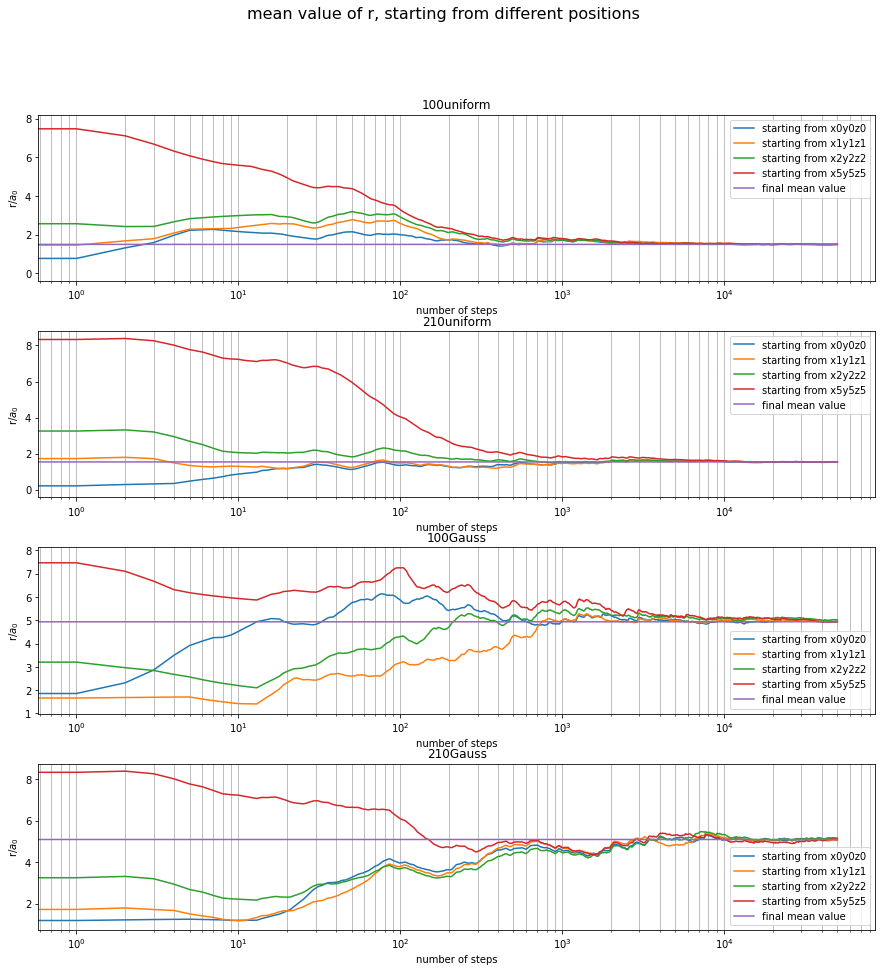

In [4]:
fig, axes = plt.subplots (len (datasets[0].data), 1)
fig.set_size_inches (15,15)
fig.subplots_adjust (hspace=0.3)
fig.suptitle ("mean value of r, starting from different positions", fontsize=16)

for ind, (dataset, title) in enumerate (zip (datasets, titles)): 
    for branch, ax in zip (dataset.data, axes):
        for name, array in branch.items():
            ax.plot (range(array.shape[0]), array, label="starting from "+title )
            if ind == len (datasets) - 1:
                ax.plot (range (array.shape[0]), np.ones(array.shape[0]) * array [-1], label="final mean value")
                ax.set_title (name)
                ax.set_xlabel ("number of steps")
                ax.set_ylabel ("r/$a_0$")
                ax.set_xscale ("log")
                ax.grid (True, axis='x', which="both")
                ax.legend()
        


One can see that, by starting far from the origin, the equilibration time increases, as expected, but in the end equilibrium is reached.

After detrmining the number of equilibration steps, the simulation is run again: this time, each sthocastic process is let evolve for enough moves so as to ensure it has equilibrated; afterwards, block means for the mean radius length are computed


In [5]:
averages = measurements (4, 3, dirname + '/' + "05-1.dat")

averages.print_names()

branch 0:  100Gauss, error, acceptance 

branch 1:  100uniform, error, acceptance 

branch 2:  210Gauss, error, acceptance 

branch 3:  210uniform, error, acceptance 



Below we plot the acceptances for each process: as the plot shows, with a suitable choice of parameters for the Gauss and uniform moves, their acceptances have been kept between $50\%$ and $70\%$

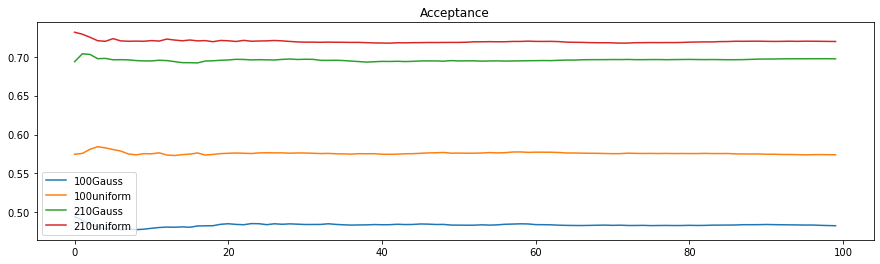

In [7]:
for branch in averages.data:
    plt.plot (range (branch["acceptance"].shape[0]), branch ["acceptance"], label=next(iter(branch)))
    
plt.gcf().set_size_inches(15,4)
plt.title ("Acceptance")
plt.legend()
plt.show()

Below are the plots for the calculated mean values of distance from the origin

100Gauss
100uniform
210Gauss
210uniform


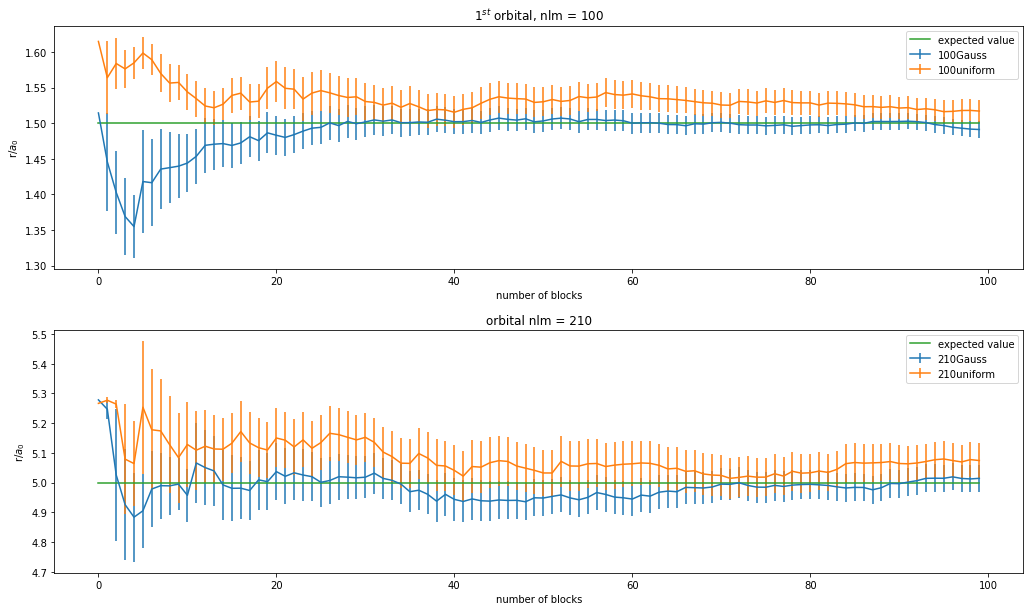

In [9]:
fig, axes = plt.subplots (2,1)
fig.set_size_inches (15, 9)
fig.tight_layout (pad=4.0)


titles = ["$1^{st}$ orbital, nlm = 100", "orbital nlm = 210"]
expectations = [1.5, 5]

for branch in averages.data:
    ind = 0
    label = next(iter(branch))
    if re.search (r'210', label):
        ind = 1
    print (label)
    
    x = range (branch[label].shape[0])
    axes [ind].errorbar (x, branch[label], branch ["error"], label=label)
    
    if re.search (r'(?<=\d\d0)u', label):
        axes [ind]. plot (x, np.ones (len(x)) * expectations [ind], label="expected value")
        
        axes [ind]. set_title (titles [ind])
        axes [ind]. set_xlabel ("number of blocks")
        axes [ind]. set_ylabel ("r/$a_0$")
        axes [ind]. legend()

    

    

It can be observed that averages converge to the expected value. It seems that, however, by sampling whith gaussian probability, one obtains faster convergence 